In [47]:
import numpy as np

pca_embeddings = np.load('embeddings/pca_embeddings.npy')
pca_embeddings.shape

(5588, 30)

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_embeddings = scaler.fit_transform(pca_embeddings)

In [49]:
import matplotlib.pyplot as plt

def plot_clusters(labels, title):
    plt.scatter(scaled_embeddings[:, 0], scaled_embeddings[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()


# Kmeans

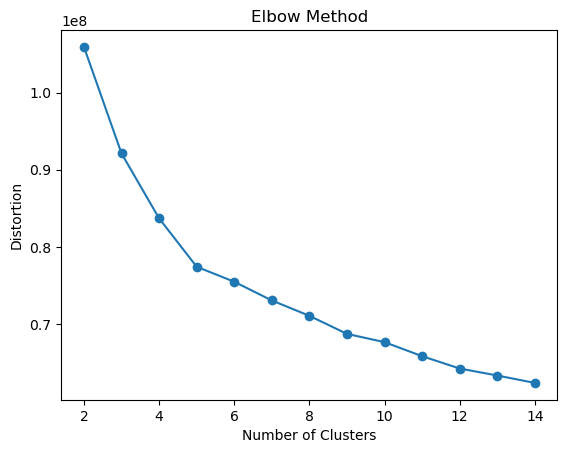

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_embeddings)
    distortions.append(kmeans.inertia_)

plt.plot(range(2, 15), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

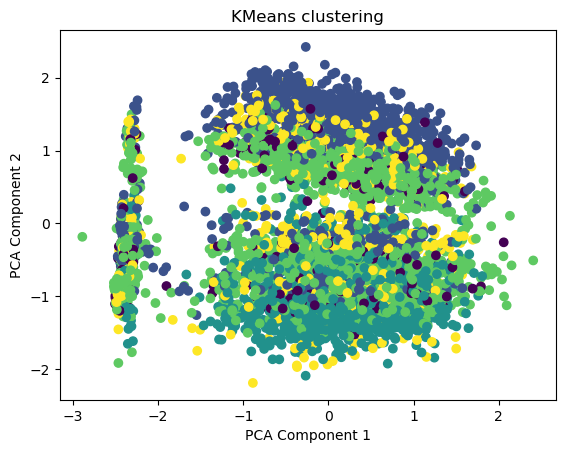

In [51]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels_km = kmeans.fit_predict(scaled_embeddings)
plot_clusters(cluster_labels_km, 'KMeans clustering')

# DBScan

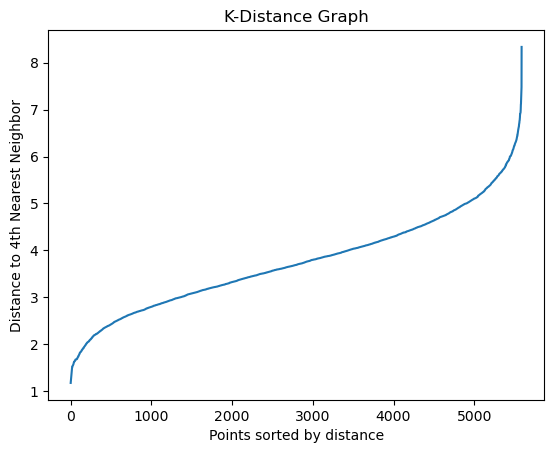

In [52]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Calculate distances to the 4th nearest neighbor (min_samples - 1)
neighbors = NearestNeighbors(n_neighbors=4)  # min_samples - 1
neighbors_fit = neighbors.fit(scaled_embeddings)
distances, _ = neighbors_fit.kneighbors(scaled_embeddings)

# Sort and plot the distances
distances = np.sort(distances[:, -1])  # Use the largest distance in each neighborhood
plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 4th Nearest Neighbor")
plt.show()


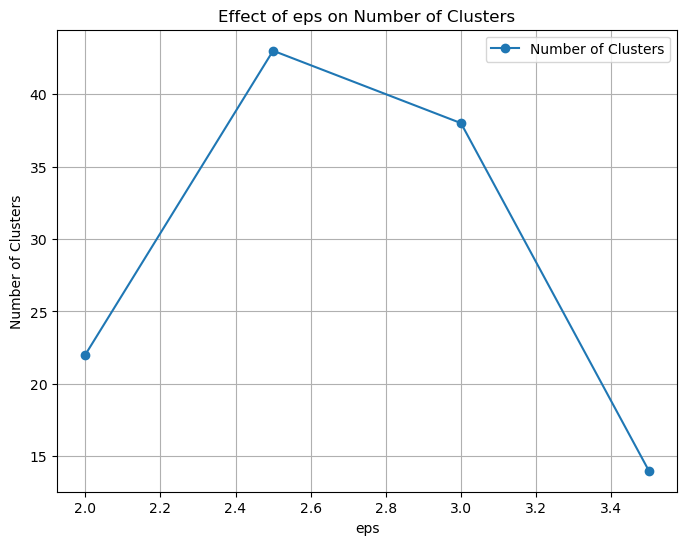

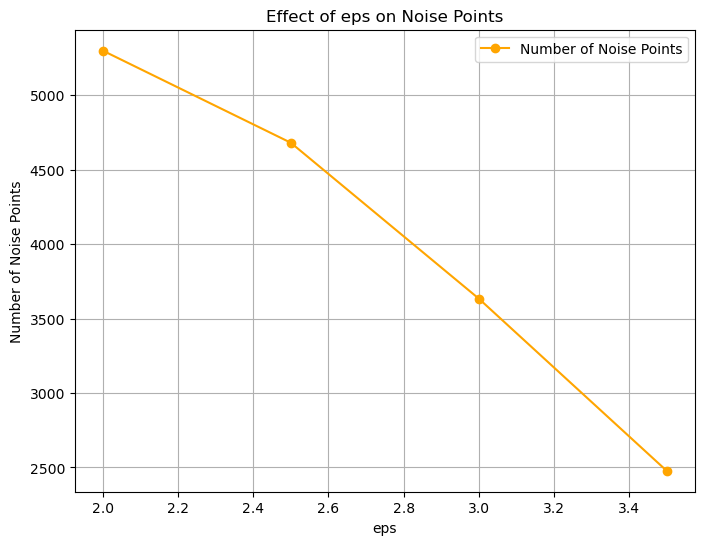

In [53]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Define a range of eps values to explore
eps_values = [2.0, 2.5, 3.0, 3.5]

# Placeholder to store results
cluster_results = {}

# Run DBSCAN for different eps values
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=4)
    cluster_labels = dbscan.fit_predict(scaled_embeddings)
    num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)  # Exclude noise
    noise_points = list(cluster_labels).count(-1)
    cluster_results[eps] = (num_clusters, noise_points)

# Plot results: Number of clusters vs eps
eps_list = list(cluster_results.keys())
num_clusters_list = [cluster_results[eps][0] for eps in eps_list]
noise_points_list = [cluster_results[eps][1] for eps in eps_list]

# Plot Number of Clusters
plt.figure(figsize=(8, 6))
plt.plot(eps_list, num_clusters_list, marker='o', label='Number of Clusters')
plt.title('Effect of eps on Number of Clusters')
plt.xlabel('eps')
plt.ylabel('Number of Clusters')
plt.grid()
plt.legend()
plt.show()

# Plot Noise Points
plt.figure(figsize=(8, 6))
plt.plot(eps_list, noise_points_list, marker='o', label='Number of Noise Points', color='orange')
plt.title('Effect of eps on Noise Points')
plt.xlabel('eps')
plt.ylabel('Number of Noise Points')
plt.grid()
plt.legend()
plt.show()

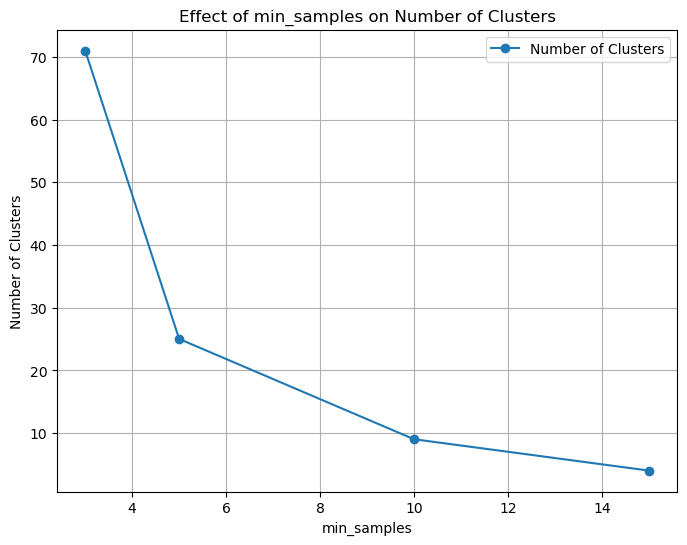

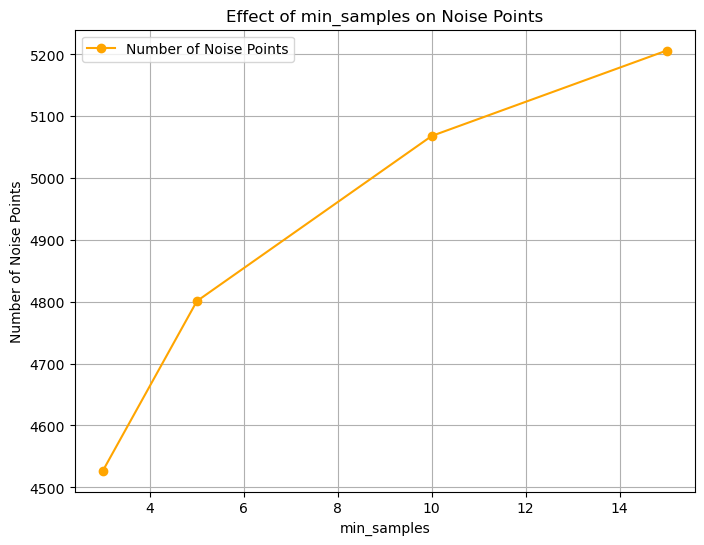

In [54]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Define a fixed eps value and range of min_samples to explore
eps = 2.5  # Set based on the k-distance graph
min_samples_values = [3, 5, 10, 15]

# Placeholder to store results
cluster_results = {}

# Run DBSCAN for different min_samples values
for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(scaled_embeddings)
    num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)  # Exclude noise
    noise_points = list(cluster_labels).count(-1)
    cluster_results[min_samples] = (num_clusters, noise_points)

# Plot results: Number of clusters vs min_samples
min_samples_list = list(cluster_results.keys())
num_clusters_list = [cluster_results[ms][0] for ms in min_samples_list]
noise_points_list = [cluster_results[ms][1] for ms in min_samples_list]

# Plot Number of Clusters
plt.figure(figsize=(8, 6))
plt.plot(min_samples_list, num_clusters_list, marker='o', label='Number of Clusters')
plt.title('Effect of min_samples on Number of Clusters')
plt.xlabel('min_samples')
plt.ylabel('Number of Clusters')
plt.grid()
plt.legend()
plt.show()

# Plot Noise Points
plt.figure(figsize=(8, 6))
plt.plot(min_samples_list, noise_points_list, marker='o', label='Number of Noise Points', color='orange')
plt.title('Effect of min_samples on Noise Points')
plt.xlabel('min_samples')
plt.ylabel('Number of Noise Points')
plt.grid()
plt.legend()
plt.show()


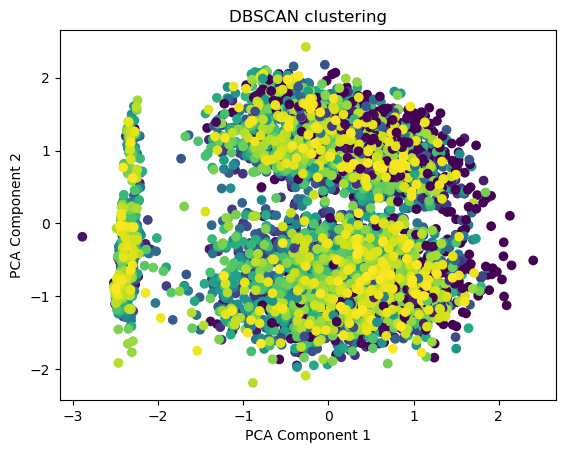

In [55]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.5, min_samples=1)
cluster_labels_db = dbscan.fit_predict(scaled_embeddings)
plot_clusters(cluster_labels_db, 'DBSCAN clustering')

# HDBScan

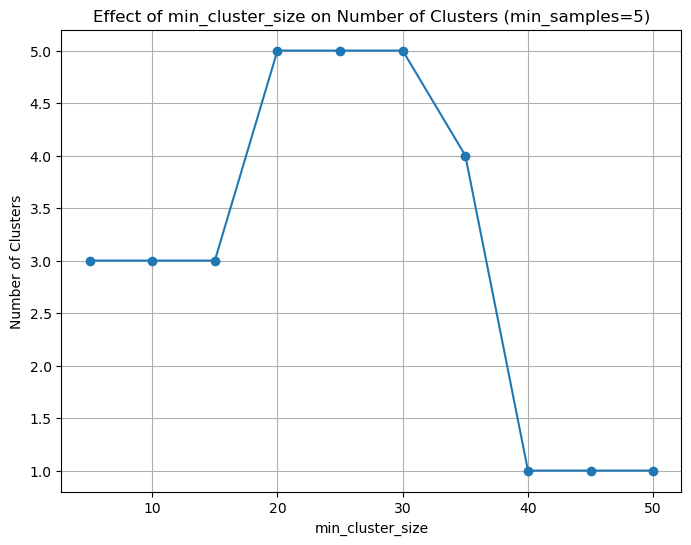

In [56]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt

# Define a range of values for min_cluster_size and min_samples
min_cluster_sizes = range(5, 51, 5)  # Example range for min_cluster_size
min_samples = 5  # Keep min_samples constant for this example

# Placeholder to store results
results = []

# Iterate through the range of min_cluster_size values
for min_cluster_size in min_cluster_sizes:
    hdbscan_cluster = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
    cluster_labels_hdb = hdbscan_cluster.fit_predict(scaled_embeddings)
    
    # Calculate the number of clusters formed (excluding noise, labeled as -1)
    #num_clusters = len(set(cluster_labels_hdb)) - (1 if -1 in cluster_labels_hdb else 0)
    num_clusters = len(set(cluster_labels_hdb))
    results.append((min_cluster_size, num_clusters))

# Convert results to numpy array for easier plotting
results = np.array(results)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(results[:, 0], results[:, 1], marker='o')
plt.title(f'Effect of min_cluster_size on Number of Clusters (min_samples={min_samples})')
plt.xlabel('min_cluster_size')
plt.ylabel('Number of Clusters')
plt.grid()
plt.show()


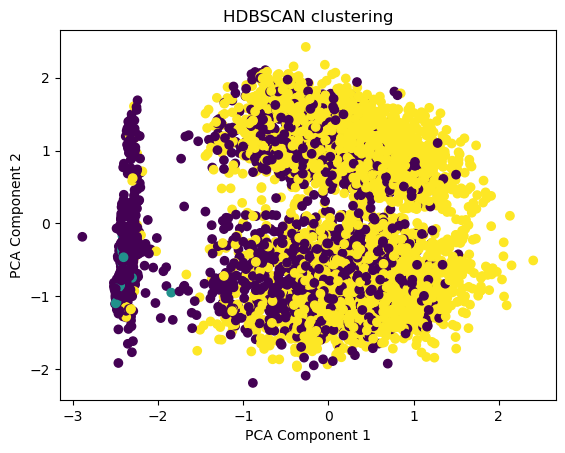

In [57]:
import hdbscan

hdbscan_cluster = hdbscan.HDBSCAN(min_samples=3, min_cluster_size=20)
cluster_labels_hdb = hdbscan_cluster.fit_predict(scaled_embeddings)
plot_clusters(cluster_labels_hdb, 'HDBSCAN clustering')


In [58]:
import numpy as np

unique, counts = np.unique(cluster_labels_hdb, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print(cluster_counts)


{-1: 1828, 0: 31, 1: 3729}


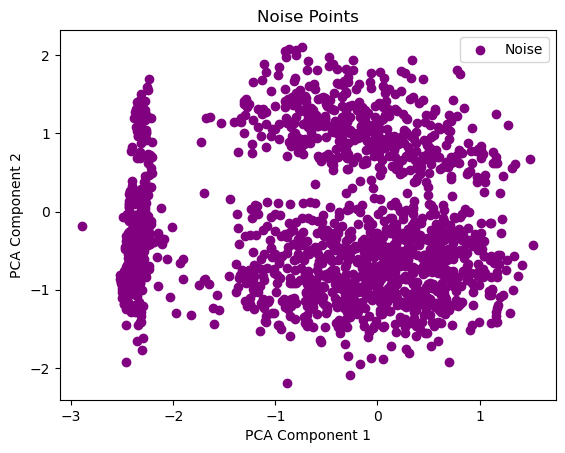

                                                  Title  \
1     Learning from Massive Human Videos for Univers...   
4     E-CAR: Efficient Continuous Autoregressive Ima...   
9     TheAgentCompany: Benchmarking LLM Agents on Co...   
10    AKiRa: Augmentation Kit on Rays for optical vi...   
25         Adversarial Hubness in Multi-Modal Retrieval   
...                                                 ...   
5579  Analytical Models for Motifs in Temporal Netwo...   
5581  Source Detection via Contact Tracing in the Pr...   
5582  Neural Myerson Auction for Truthful and Energy...   
5585  How Powerful are Interest Diffusion on Purchas...   
5587  Social Sensors in Epidemiological Networks via...   

                                               Abstract        Date  \
1     Scalable learning of humanoid robots is crucia...  2024-12-18   
4     Recent advances in autoregressive (AR) models ...  2024-12-18   
9     We interact with computers on an everyday basi...  2024-12-18   
10    R

In [59]:
import pandas as pd
# Filter the noise points (label -1)
noise_points = scaled_embeddings[cluster_labels_hdb == -1]

plt.scatter(noise_points[:, 0], noise_points[:, 1], c='purple', label='Noise')
plt.title('Noise Points')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Save the indices of noise points
noise_indices = np.where(cluster_labels_hdb == -1)[0]

abstracts = pd.read_csv('data/arxiv_abstracts.csv')
# Assuming `abstracts` is the DataFrame containing the original abstracts
noise_abstracts = abstracts.iloc[noise_indices]
print(noise_abstracts)

# Save the noise abstracts to a CSV file
noise_abstracts.to_csv('data/noise_abstracts.csv', index=False)
print("Saved noise abstracts to noise_abstracts.csv")


In [60]:
from sklearn.metrics import silhouette_score
silhouette_km = silhouette_score(scaled_embeddings, cluster_labels_km)
silhouette_db = silhouette_score(scaled_embeddings, cluster_labels_db)
silhouette_hdb = silhouette_score(scaled_embeddings, cluster_labels_hdb)
print(f"K-means Silhouette Score: {silhouette_km}")
print(f"DBSCAN Silhouette Score: {silhouette_db}")
print(f"HDBSCAN Silhouette Score: {silhouette_hdb}")

K-means Silhouette Score: 0.05046408250927925
DBSCAN Silhouette Score: -0.024656562134623528
HDBSCAN Silhouette Score: 0.04463377222418785


In [61]:
import pandas as pd

noise_points = scaled_embeddings[cluster_labels_hdb == -1]
non_noise_points = pca_embeddings[cluster_labels_hdb != -1]
print(f"Number of noise points: {len(noise_points)}")
print(f"Number of non-noise points: {len(non_noise_points)}")


Number of noise points: 1828
Number of non-noise points: 3760


In [62]:
from sklearn.metrics import pairwise_distances_argmin_min

# Get the centroids from the fitted K-means model
centroids = kmeans.cluster_centers_

# Find the indices of the data points closest to each centroid
closest_indices, _ = pairwise_distances_argmin_min(centroids, non_noise_points)

# Print the indices of the closest points
print("Indices of points closest to centroids:", closest_indices)

# If you want the actual points
closest_points = non_noise_points[closest_indices]
print("Points closest to centroids:\n", closest_points)


Indices of points closest to centroids: [847 847 847 847 847]
Points closest to centroids:
 [[  3.2105322  -32.856094     0.06893937   7.785641    -7.2523217
    1.4779527    9.475984    -4.6052103    4.7310724   12.0310545
   10.410882     9.024239    -3.5380125   -5.129704     8.858573
    2.5134754    1.8443815   18.18919      7.8777986   -4.238716
    3.5256221    1.010874    -0.06644385  -3.9966936    7.250223
   -8.638685     2.060924    -2.4935732   -1.4665108   -0.88976794]
 [  3.2105322  -32.856094     0.06893937   7.785641    -7.2523217
    1.4779527    9.475984    -4.6052103    4.7310724   12.0310545
   10.410882     9.024239    -3.5380125   -5.129704     8.858573
    2.5134754    1.8443815   18.18919      7.8777986   -4.238716
    3.5256221    1.010874    -0.06644385  -3.9966936    7.250223
   -8.638685     2.060924    -2.4935732   -1.4665108   -0.88976794]
 [  3.2105322  -32.856094     0.06893937   7.785641    -7.2523217
    1.4779527    9.475984    -4.6052103    4.7310724

In [63]:
abstracts['Cluster'] = cluster_labels_hdb

# Filter out noise points (-1) and group by cluster
clusters = abstracts[abstracts['Cluster'] != -1].groupby('Cluster')

# Iterate through each cluster and save abstracts
for cluster_id, cluster_data in clusters:
    # Save abstracts belonging to this cluster
    cluster_filename = f'cluster_{cluster_id}_abstracts.csv'
    cluster_data.to_csv(cluster_filename, index=False)
    print(f"Saved Cluster {cluster_id} abstracts to {cluster_filename}")

# Optionally, save a single file with all clusters grouped
abstracts.to_csv('data/all_clusters_abstracts.csv', index=False)
print("Saved all cluster abstracts to all_clusters_abstracts.csv")


Saved Cluster 0 abstracts to cluster_0_abstracts.csv
Saved Cluster 1 abstracts to cluster_1_abstracts.csv
Saved all cluster abstracts to all_clusters_abstracts.csv


In [72]:
import pandas as pd

def clustered_abstracts(abstracts, cluster_labels, title):
    # Convert embeddings to a DataFrame if needed
    embeddings_df = pd.DataFrame(scaled_embeddings, columns=[f"Embedding_{i}" for i in range(scaled_embeddings.shape[1])])

    # Add cluster indices to the embeddings DataFrame
    embeddings_df["Cluster"] = cluster_labels

    # Add cluster indices to the existing abstracts DataFrame
    abstracts["Cluster"] = cluster_labels

    # Save the updated DataFrame for later use
    abstracts.to_csv(f"data/abstracts_{title}.csv", index=False)

    #cluster distribution
    return abstracts["Cluster"].value_counts()

print(clustered_abstracts(abstracts, cluster_labels_hdb, "cluster_hdb"))
print(clustered_abstracts(abstracts, cluster_labels_db, "cluster_db"))
print(clustered_abstracts(abstracts, cluster_labels_km, "cluster_km"))

Cluster
 1    3729
-1    1828
 0      31
Name: count, dtype: int64
Cluster
6       630
14       46
81       40
45       19
1379     17
       ... 
1575      1
1576      1
1577      1
1578      1
4451      1
Name: count, Length: 4452, dtype: int64
Cluster
3    2137
1    1239
2    1007
4     822
0     383
Name: count, dtype: int64


In [73]:
abstracts_indices = pd.read_csv('data/abstracts_cluster_db.csv')
abstracts_indices.head()

,Title,Abstract,Date,Authors,Cluster
0,AniDoc: Animation Creation Made Easier,The production of 2D animation follows an indu...,2024-12-18,"Yihao Meng, Hao Ouyang, Hanlin Wang, Qiuyu Wan...",0
1,Learning from Massive Human Videos for Univers...,Scalable learning of humanoid robots is crucia...,2024-12-18,"Jiageng Mao, Siheng Zhao, Siqi Song, Tianheng ...",1
2,Thinking in Space: How Multimodal Large Langua...,Humans possess the visual-spatial intelligence...,2024-12-18,"Jihan Yang, Shusheng Yang, Anjali W. Gupta, Ri...",2
3,Autoregressive Video Generation without Vector...,This paper presents a novel approach that enab...,2024-12-18,"Haoge Deng, Ting Pan, Haiwen Diao, Zhengxiong ...",3
4,E-CAR: Efficient Continuous Autoregressive Ima...,Recent advances in autoregressive (AR) models ...,2024-12-18,"Zhihang Yuan, Yuzhang Shang, Hanling Zhang, To...",4
